# Defined Function

In [ ]:
# Split Train and Test and check shape 
def SplitDataFrameToTrainAndTest(DataFrame, TrainDataRate, TargetAtt):
    # gets a random TrainDataRate % of the entire set
    training = DataFrame.sample(frac=TrainDataRate, random_state=1)
    # gets the left out portion of the dataset
    testing = DataFrame.loc[~DataFrame.index.isin(training.index)]

    X_train = training.drop(TargetAtt, 1)
    y_train = training[[TargetAtt]]
    X_test = testing.drop(TargetAtt, 1)
    y_test = testing[[TargetAtt]]

    return X_train, y_train, X_test, y_test
    
def PrintTrainTestInformation(X_train, y_train, X_test, y_test):
  print("Train rows and columns : ", X_train.shape)
  print("Test rows and columns : ", X_test.shape)

In [ ]:
def NaiveBayesLearning(DataTrain, TargetTrain):
    from sklearn.naive_bayes import GaussianNB
    NBModel = GaussianNB()
    NBModel.fit(DataTrain, TargetTrain.values.ravel())

    return NBModel

def NaiveBayesTesting(NBModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = NBModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)

    return Accuracy, PredictTest

In [ ]:
def LogisticRegressionLearning(DataTrain, TargetTrain):
    # Apply the Logistic Regression
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    logreg = LogisticRegression()
    # training by Logistic Regression
    logreg.fit(DataTrain, TargetTrain.values.ravel())

    return logreg

def LogisticRegressionTesting(LRModel,DataTest, TargetTest):
    # Testing and calculate the accuracy
    from sklearn.metrics import accuracy_score

    logreg = LRModel
    PredictTest = logreg.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Logistic regression accuracy: {:.3f}'.format(Accuracy))

    return Accuracy, PredictTest

In [ ]:
def RandomForestLearning(DataTrain, TargetTrain):
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier()
    rf.fit(DataTrain, TargetTrain.values.ravel())

    return rf

def RandomForestTesting(RFModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score

    PredictTest = RFModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))

    return Accuracy, PredictTest

In [ ]:
def SVMLearning(DataTrain, TargetTrain, ClassifierType = " "):
    from sklearn.svm import SVC
    if(ClassifierType == 'Linear'):
        svc = SVC(kernel="linear", C=0.025)
#         print('SVM Linear processing')
    # Radial basis function kernel
    elif (ClassifierType == 'RBF'):
        svc = SVC(gamma=2, C=1)
#         print('SVM RBF processing')
    else:
        svc = SVC()
#         print('SVM Default processing')
    svc.fit(DataTrain, TargetTrain.values.ravel())
    return svc

def SVMTesting(SVMModel, DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = SVMModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Support Vector Machine Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))
    return Accuracy, PredictTest

In [ ]:
def KNNLearning(DataTrain, TargetTrain, K = 3):
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(DataTrain, TargetTrain.values.ravel())

    return neigh

def KNNTesting(KNNModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score

    PredictTest = KNNModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('KNN Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))

    return Accuracy, PredictTest

# **Main Code**

In [ ]:
# import basic libraries 
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# import plot libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# import ml libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import linear_model, datasets 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.metrics import accuracy_score 
from sklearn.svm import LinearSVC, SVC

In [ ]:
# Read data
data = pd.read_csv("CustomerChurn.csv")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Split Train and Test and check shape 
data_train, target_train, data_test, target_test = SplitDataFrameToTrainAndTest(data, 0.6, 'Churn')
PrintTrainTestInformation(data_train, target_train, data_test, target_test)

Train rows and columns :  (2000, 19)
Test rows and columns :  (1333, 19)


In [ ]:
data_encoder = data.copy()
data_encoder['State'] = LabelEncoder().fit_transform(data_encoder['State'])
data_encoder['International plan'] = LabelEncoder().fit_transform(data_encoder['International plan'])
data_encoder['Voice mail plan'] = LabelEncoder().fit_transform(data_encoder['Voice mail plan'])
data_encoder = data_encoder.join(pd.get_dummies(data_encoder['Area code'], prefix='Area_code_'))
data_encoder = data_encoder.drop('Area code', axis=1)
data_encoder.head(10)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area_code__408,Area_code__415,Area_code__510
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,1,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,0,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,1,0
5,1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0,0,1
6,19,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,0,0,1
7,24,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,0,1,0
8,18,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,1,0,0
9,49,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,0,1,0


In [ ]:
# Split Train and Test and check shape 
data_train_encoder, target_train_encoder, data_test_encoder, target_test_encoder = SplitDataFrameToTrainAndTest(data_encoder, 0.6, 'Churn')
PrintTrainTestInformation(data_train_encoder, target_train_encoder, data_test_encoder, target_test_encoder)

Train rows and columns :  (2000, 21)
Test rows and columns :  (1333, 21)


In [ ]:
X_train = data_train_encoder
y_train = target_train_encoder
X_test = data_test_encoder
y_test = target_test_encoder

NBModel = NaiveBayesLearning(X_train, y_train)
NBAccuracy,NBPredictTest = NaiveBayesTesting(NBModel,X_test, y_test)
print('Naive Bayes accuracy: {:.3f}'.format(NBAccuracy))

LRModel = LogisticRegressionLearning(X_train, y_train)
LRAccuracy,LRPredictTest = LogisticRegressionTesting(LRModel,X_test, y_test)
print('Logistic Regression accuracy: {:.3f}'.format(LRAccuracy))

RFModel = RandomForestLearning(X_train, y_train)
RFAccuracy,RFPredictTest = RandomForestTesting(RFModel,X_test, y_test)
print('Random Forest accuracy: {:.6f}'.format(RFAccuracy))

LiSVMModel = SVMLearning(X_train, y_train)
LiSVMAccuracy,LiSVMPredictTest = SVMTesting(LiSVMModel, X_test, y_test)
print('Linear SVM accuracy: {:.6f}'.format(LiSVMAccuracy))

RBFSVMModel = SVMLearning(X_train, y_train, 'RBF')
RBFSVMAccuracy,RBFSVMPredictTest = SVMTesting(RBFSVMModel, X_test, y_test)
print('RBF SVM accuracy: {:.6f}'.format(RBFSVMAccuracy))

KNNModel = KNNLearning(X_train, y_train)
KNNAccuracy,KNNPredictTest = KNNTesting(KNNModel,X_test, y_test)
print('K Nearest Neighbor accuracy: {:.6f}'.format(KNNAccuracy))

Naive Bayes accuracy: 0.866
Logistic Regression accuracy: 0.854
Random Forest accuracy: 0.951238
Linear SVM accuracy: 0.857464
RBF SVM accuracy: 0.857464
K Nearest Neighbor accuracy: 0.867217


(2000, 21)


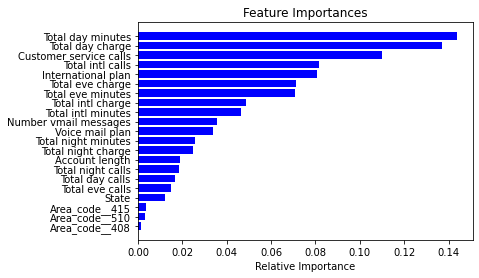

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(data_train_encoder,target_train_encoder)

print(data_train_encoder.shape)
features = data_train_encoder.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-len(features):]  # top features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Get numerical feature importances
feature_list = list(data_train_encoder.columns)
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Total day minutes    Importance: 0.14
Variable: Total day charge     Importance: 0.14
Variable: Customer service calls Importance: 0.11
Variable: International plan   Importance: 0.08
Variable: Total intl calls     Importance: 0.08
Variable: Total eve minutes    Importance: 0.07
Variable: Total eve charge     Importance: 0.07
Variable: Total intl minutes   Importance: 0.05
Variable: Total intl charge    Importance: 0.05
Variable: Number vmail messages Importance: 0.04
Variable: Voice mail plan      Importance: 0.03
Variable: Total night minutes  Importance: 0.03
Variable: Account length       Importance: 0.02
Variable: Total day calls      Importance: 0.02
Variable: Total night calls    Importance: 0.02
Variable: Total night charge   Importance: 0.02
Variable: State                Importance: 0.01
Variable: Total eve calls      Importance: 0.01
Variable: Area_code__408       Importance: 0.0
Variable: Area_code__415       Importance: 0.0
Variable: Area_code__510       Importan

In [ ]:
# Split Train and Test and check shape 
AttSelection = ["Total day charge", "Total day minutes", "Customer service calls", "International plan", "Total eve minutes",
                "Total intl calls", "Total eve charge", "Total intl minutes", "Total intl charge", "Voice mail plan",
                "Number vmail messages", "Total night minutes", "Total night calls", "Total night charge",
               "Churn"]

data_train_encoder_feselection02, target_train_encoder_feselection02, data_test_encoder_feselection02, target_test_encoder_feselection02 = SplitDataFrameToTrainAndTest(data_encoder[AttSelection], 0.6, 'Churn')
PrintTrainTestInformation(data_train_encoder_feselection02, target_train_encoder_feselection02, data_test_encoder_feselection02, target_test_encoder_feselection02)

Train rows and columns :  (2000, 14)
Test rows and columns :  (1333, 14)


In [ ]:
# Retest all traditional classification approaches
X_train = data_train_encoder_feselection02
y_train = target_train_encoder_feselection02
X_test = data_test_encoder_feselection02
y_test = target_test_encoder_feselection02

NBModel = NaiveBayesLearning(X_train, y_train)
NBAccuracy,NBPredictTest = NaiveBayesTesting(NBModel,X_test, y_test)
print('Naive Bayes accuracy: {:.6f}'.format(NBAccuracy))

LRModel = LogisticRegressionLearning(X_train, y_train)
LRAccuracy,LRPredictTest = LogisticRegressionTesting(LRModel,X_test, y_test)
print('Logistic Regression accuracy: {:.6f}'.format(LRAccuracy))

RFModel = RandomForestLearning(X_train, y_train)
RFAccuracy,RFPredictTest = RandomForestTesting(RFModel,X_test, y_test)
print('Random Forest accuracy: {:.6f}'.format(RFAccuracy))

LiSVMModel = SVMLearning(X_train, y_train)
LiSVMAccuracy,LiSVMPredictTest = SVMTesting(LiSVMModel, X_test, y_test)
print('Linear SVM accuracy: {:.6f}'.format(LiSVMAccuracy))

RBFSVMModel = SVMLearning(X_train, y_train, 'RBF')
RBFSVMAccuracy,RBFSVMPredictTest = SVMTesting(RBFSVMModel, X_test, y_test)
print('RBF SVM accuracy: {:.6f}'.format(RBFSVMAccuracy))

KNNModel = KNNLearning(X_train, y_train)
KNNAccuracy,KNNPredictTest = KNNTesting(KNNModel,X_test, y_test)
print('K Nearest Neighbor accuracy: {:.6f}'.format(KNNAccuracy))

Naive Bayes accuracy: 0.864966
Logistic Regression accuracy: 0.856714
Random Forest accuracy: 0.951988
Linear SVM accuracy: 0.857464
RBF SVM accuracy: 0.857464
K Nearest Neighbor accuracy: 0.885971


*Neural Network*

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)

## Create our model
model = Sequential()

# 1st layer: input_dim=21, 12 nodes, RELU
model.add(Dense(12, input_dim=21,activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8,activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1,activation='sigmoid' ))

## Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                264       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Retest all traditional classification approaches
X_train = data_train_encoder
y_train = target_train_encoder
X_testNN = data_test_encoder
y_testNN = target_test_encoder

epochs = 500  # num of epochs to test for
batch_size = 15

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_testNN, y_testNN),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training...

Epoch 00001: val_accuracy improved from -inf to 0.88972, saving model to pima-weights.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.88972

Epoch 00003: val_accuracy did not improve from 0.88972

Epoch 00004: val_accuracy did not improve from 0.88972

Epoch 00005: val_accuracy did not improve from 0.88972

Epoch 00006: val_accuracy did not improve from 0.88972

Epoch 00007: val_accuracy improved from 0.88972 to 0.89272, saving model to pima-weights.best.hdf5

Epoch 00008: val_accuracy did not improve from 0.89272

Epoch 00009: val_accuracy did not improve from 0.89272

Epoch 00010: val_accuracy improved from 0.89272 to 0.89422, saving model to pima-weights.best.hdf5

Epoch 00011: val_accuracy did not improve from 0.89422

Epoch 00012: val_accuracy did not improve from 0.89422

Epoch 00013: val_accuracy did not improve from 0.89422

Epoch 00014: val_accuracy did not improve from 0.89422

Epoch 00015: val_accuracy did not improve from 0.89422

Epoch 000

KeyboardInterrupt: ignored

In [47]:
y_predNN = model.predict(X_testNN)

scoreNN = model.evaluate(X_testNN, y_testNN,verbose=1)

print(scoreNN)

42/42 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8912
[0.27899160981178284, 0.8912228345870972]


In [48]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_testNN,y_predNN.round())
#confusion_matrix(y_testNN, y_predNN)
# Precision 
precision_score(y_testNN, y_predNN.round())
# Recall
recall_score(y_testNN, y_predNN.round())
# F1 score
f1_score(y_testNN,y_predNN.round())
# Cohen's kappa
cohen_kappa_score(y_testNN, y_predNN.round())

0.4616811445664011